# Explore here

In [41]:
# Import
# Basics
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting data
from sklearn.model_selection import train_test_split

In [33]:
# Get data
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

# Configure pandas to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Initial Data Display
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Significado de los features del dataset:

- `MedInc` : Ingresos medios de los hogares dentro de un bloque de casas (medidos en decenas de miles de dolares)
- `HouseAge` : Edad media de una casa dentro de un bloque; un numero mas bajo indica un edificio mas nuevo
- `AveRooms` : Promedio de habitaciones dentro de un bloque
- `AveBedrms` : Promedio de dormitorios dentro de un bloque
- `Population` : Numero total de personas que residen dentro de un bloque
- `AveOccup` : Promedio de personas por hogares que residen dentro de un bloque (Poblacion / Hogares)
- `Latitude` : Una medida de que tan al norte se encuentra una casa; un valor mas alto es cuanto mas al norte
- `Longitude` : Una medida de que tan al oeste esta una casa; un valor mas alto es cuanto mas al oeste esté
- `MedHouseVal` : Valor medio de las viviendas para los hogares dentro de un bloque (medidos en cientos de miles de dolares)

In [34]:
# Para este analisis de clasificacion solo se tendra en cuenta la ubicacion de las casas y el ingreso medio
df = df.drop(["HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "MedHouseVal"], axis=1)
df.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [35]:
# DataFrame Dimensions
df.shape

(20640, 3)

In [36]:
# Basic Information on Data Types and Non-Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     20640 non-null  float64
 1   Latitude   20640 non-null  float64
 2   Longitude  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [37]:
# Search and Removal of Duplicate Data
duplicates = df.duplicated().sum()
duplicates

np.int64(5)

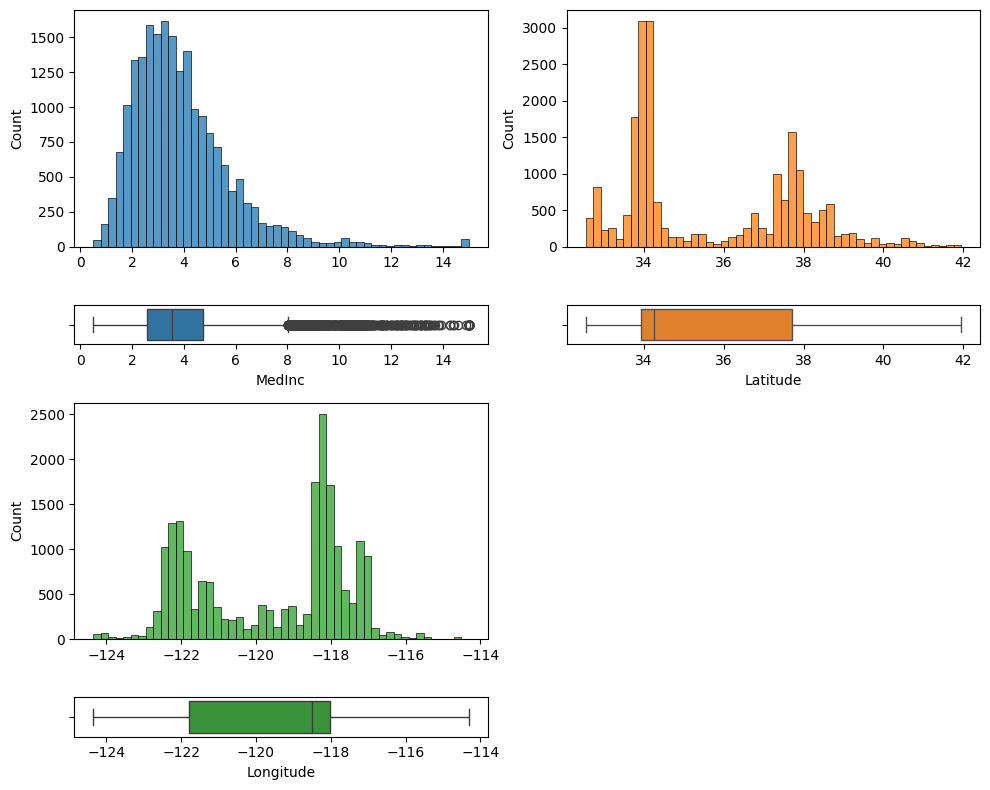

In [38]:
# Analysis of Numerical Variables
fig, axis = plt.subplots(4, 2, figsize = (10, 8), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Create a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = df, x = "MedInc", bins=50, color="#1f77b4").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "MedInc", color="#1f77b4").set(xlabel = "MedInc")

sns.histplot(ax = axis[0, 1], data = df, x = "Latitude", bins=50, color="#ff7f0e").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "Latitude", color="#ff7f0e").set(xlabel = "Latitude")

sns.histplot(ax = axis[2, 0], data = df, x = "Longitude", bins=50, color="#2ca02c").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "Longitude", color="#2ca02c").set(xlabel = "Longitude")

# Delete axis
axis[2, 1].axis("off")
axis[3, 1].axis("off")

# Adjust the Layout
plt.tight_layout()

# Display the Plot
plt.show()

In [39]:
# Cleaning outliers

# La distribucion de "MedInc" presenta valores atipicos
# Al tratarse de ingresos medios es posible que los datos no sean erroneos

# Interquartile range
med_inc_info = df["MedInc"].describe()
var1_iqr = med_inc_info["75%"] - med_inc_info["25%"]
up_limit = med_inc_info["75%"] + 1.5 * var1_iqr
low_limit = med_inc_info["25%"] - 1.5 * var1_iqr

print(up_limit)

df[df["MedInc"] > 8].shape

# A pesar de no ser datos erroneos en nuestro primer analisis tomaremos solo los menores e iguales a 8
df = df[df["MedInc"] <= 8]
df.shape

# Con esta eliminacion tomamos mas del 96% de los datos, por lo que no debe afectar nuestra muestra de forma significativa
# De ser necesario tomaremos un umbral menos restrictivo para el tratamiento de dichos valores atipicos

8.013024999999999


(19950, 3)

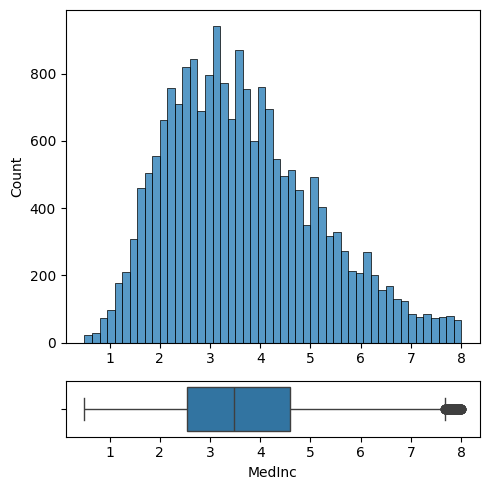

In [40]:
fig, axis = plt.subplots(2, figsize = (5, 5), gridspec_kw={'height_ratios': [6, 1]})
sns.histplot(ax = axis[0], data = df, x = "MedInc", bins=50, color="#1f77b4").set(xlabel = None)
sns.boxplot(ax = axis[1], data = df, x = "MedInc", color="#1f77b4").set(xlabel = "MedInc")
# Adjust the Layout
plt.tight_layout()
# Display the Plot
plt.show()

In [44]:
# Splitting data into train and test sets
X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 42) # stratify=y for imbalanced classes in the target

X_test.shape

(3990, 3)